## Complete Exploratory Data Analysis using Python

Exploratory Data Analysis(EDA) is an approach to analyzing datasets to summarize their main characteristics.

By using EDA, we can understand the dataset easily, find patterns, identify outliers and explore the relationship between variables by using non-graphical and graphical techniques.

EDA also helps us to choose which feature should be considered to use for our machine learning model. (aka feature selection)

Now, we know that Exploratory Data Analysis (EDA) is a very important part of a data science project to understand data and get the intuition behind each variable.

In this post, I will be focusing on step-by-step exploratory data analysis to explain EDA smoothly and concisely.

We will use the Medical Cost Personal Dataset to perform our analysis. You can find the dataset from Kaggle by clicking the data



### Table of Contents
* Understanding Business Case
* Variable Description
* Data Understanding
* Data Cleaning
* Data Visualization

### 1. Understanding Business Problem

Our business case is to predict customer charges for an insurance company based on given variables. So that the company can decide how much they charge people correctly.

### 2. Variable Description

After understanding the business case, we need to know our variables before analyzing them. Thus we have a clear understanding as we go further.

I passed the gathering data step since we already have ready to use data from Kaggle :)

Age: Age of the primary beneficiary

Sex: Insurance contractor gender, female, male

BMI: Body mass index, providing an understanding of the body, weights that are relatively high or low relative to height,
an objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

Children: Number of children covered by health insurance / Number of dependents

Smoker: Smoking

Region: the beneficiary’s residential area in the US, northeast, southeast, southwest and northwest.

Charges: Individual medical costs billed by health insurance

### 3. Data Understanding

Now we understood our business case and imported the data we need in CSV format. The next step is importing the necessary libraries. 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid') # set style

import warnings
warnings.filterwarnings('ignore') # ignore warnings


In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.shape

(1338, 7)

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.describe(include="O")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [11]:
list(df.sex.unique())

['female', 'male']

### 4. Data Cleaning

In this part of the EDA. We will check ;

* Missing Values

* Duplicated Values

In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
df.duplicated().sum()

1

In [15]:
df[df.duplicated(keep="first")]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [16]:
df.drop_duplicates(keep="first",inplace=True)

### 5. Data Visualization

A picture is worth a thousand words

Now, We understood our dataset in general and checked the missing values. We also deleted duplicated values from the data frame.

The next part of this journey is data visualization! Our goal is to perform univariate, bivariate and multivariate analysis to see the distribution and relationship between variables.

We will use the seaborn library for statistical data visualization. Seaborn is a data visualization library based on matplotlib and my favorite with ease of use.

### 5.1 Univariate Analysis
The purpose of the univariate analysis is to understand the distribution of values for a single variable.

We can perform univariate analysis with 3 options :

* Summary Statistics
* Frequency Distributions Table
* Charts ( Boxplot, Histogram, Barplot, Pie Chart)

#### Charges

<Figure size 864x432 with 0 Axes>

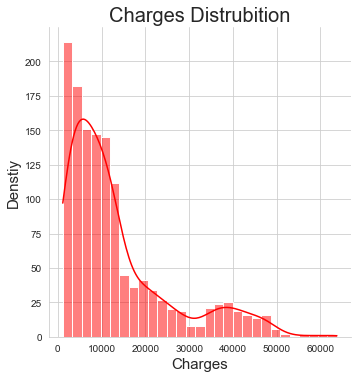

In [24]:
plt.figure(figsize=(12,6))
sns.displot(df.charges, color="r",kde=True)
plt.title('Charges Distrubition', fontsize=20)
plt.xlabel('Charges', fontsize=15)
plt.ylabel('Denstiy', fontsize=15)
plt.show()


Let’s begin with sns.distplot() function. Displot stands for distribution plot and shows us distribution and kernel density estimation by default.

The distribution plot shows us how our variable is distributed.



On the other hand, kernel density estimation allows us to estimate the probability density function from the numerical variables. So that we can easily see the probability of getting each value visually.



### Age

<Figure size 864x432 with 0 Axes>

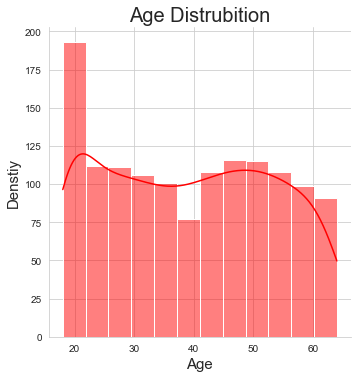

In [26]:
plt.figure(figsize=(12,6))
sns.displot(df.age, color="r",kde=True)
plt.title('Age Distrubition', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Denstiy', fontsize=15)
plt.show()

### BMI

<Figure size 864x432 with 0 Axes>

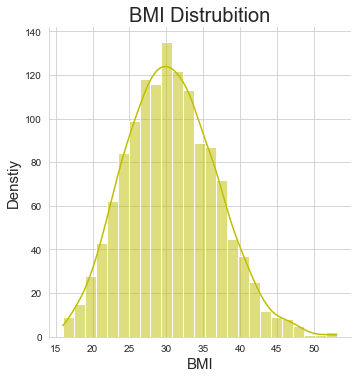

In [28]:
plt.figure(figsize=(12,6))
sns.displot(df.bmi, color="y",kde=True)
plt.title('BMI Distrubition', fontsize=20)
plt.xlabel('BMI', fontsize=15)
plt.ylabel('Denstiy', fontsize=15)
plt.show()

As seen in the code block, Matplotlib also gives us an option to create a histogram.

BMI of people seems like a normal distribution. That’s what we expected right? Most people have BMI between 27 -34 years old.

### Boxplot for Numerical Values

A boxplot is a standardized way of displaying the dataset based on a five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles.

It also helps us to detect outliers using IQR (Inter Quantile Range) method.

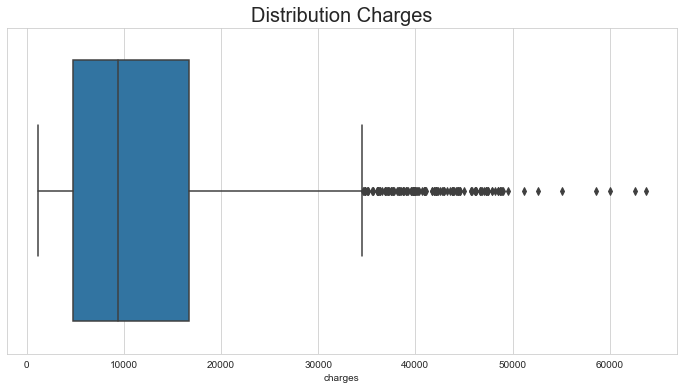

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(df.charges)
plt.title('Distribution Charges', fontsize=20)
plt.show()

By using a boxplot, We can easily interpret our variable if it has outliers. Outliers can be easily removed from our dataset. But we reconsider before removing any of them.

We need to examine or ask domain expertise if they are anomalies or not.

A common way to remove outliers is to use IQR Method.

In [30]:
Q1 = df.charges.quantile(0.25)
Q3 = df.charges.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

11911.37345


After obtaining Inter Quantile Range, we can use the IQR method to see outliers or remove them from the dataset.

In [34]:
df[(df["charges"] < Q1 - 1.5 * IQR) |  (df["charges"] > Q3 + 1.5 * IQR)]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


Now We can easily detect outliers with a boxplot or using python code. In this example. I will proceed with my analysis without removing outliers.

### Univariate Analysis for Categorical Features

A bar chart is commonly used to visualize categorical features. We will use sns.countplot() method for sex, children, smoker and region variables.

### Gender

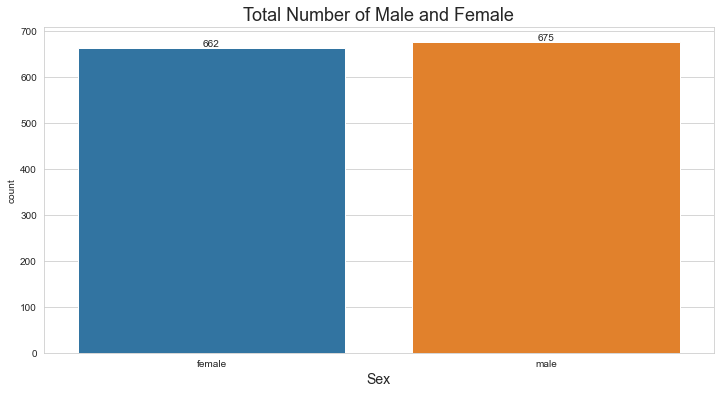

In [38]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x = "sex", data=df)
ax.bar_label(ax.containers[0])
plt.title("Total Number of Male and Female", size=18)
plt.xlabel("Sex", size=14)
plt.show()

### Children 

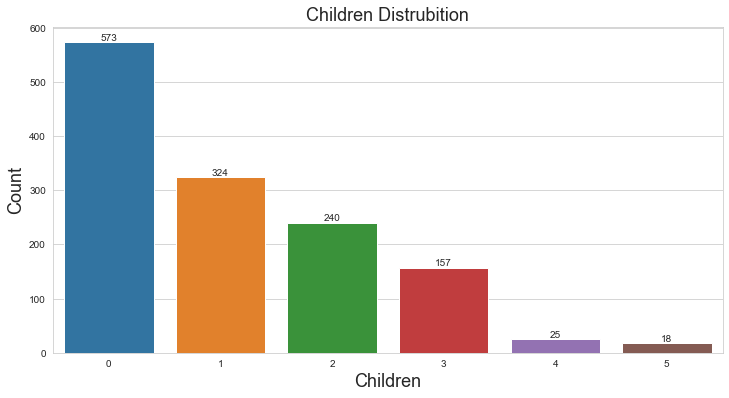

In [41]:
plt.figure(figsize=(12,6))
ax = sns.countplot(df.children)
ax.bar_label(ax.containers[0])
plt.title("Children Distrubition", size=18)
plt.xlabel("Children", size=18)
plt.ylabel("Count", size=18)
plt.show()

The majority of the people do not have any children.

Few people have 4 and 5 children.

### Smoker 

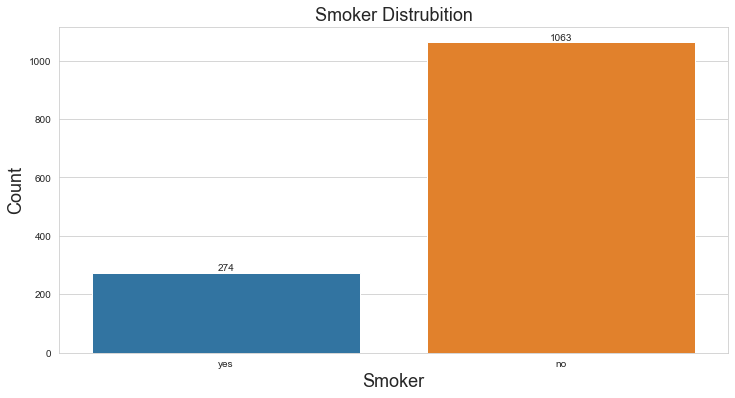

In [42]:
plt.figure(figsize=(12,6))
ax = sns.countplot(df.smoker)
ax.bar_label(ax.containers[0])
plt.title("Smoker Distrubition", size=18)
plt.xlabel("Smoker", size=18)
plt.ylabel("Count", size=18)
plt.show()


The number of smokers is almost 4 times more than non-smokers. I showed you the way to see numbers in a non-graphical way below.

Using the value_counts method, we can easily see the number of each value within the variable.

In [43]:
df.smoker.value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

### Region

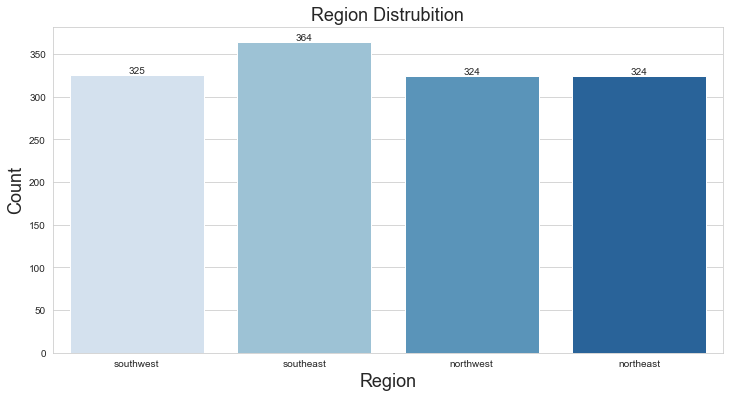

In [46]:
plt.figure(figsize=(12,6))
ax = sns.countplot(df.region, palette="Blues")
ax.bar_label(ax.containers[0])
plt.title("Region Distrubition", size=18)
plt.xlabel("Region", size=18)
plt.ylabel("Count", size=18)
plt.show()

All four regions are almost equally distributed. The number of people from the southeast is slightly more than others.

### 5.2 Bivariate Analysis

Bivariate analysis is the analysis of exactly two variables. We will use bivariate analysis to find relationships between two variables.

For bivariate analysis, we usually use boxplot(categorical vs numerical), scatterplot(numerical vs numerical), or contingency table(categorical vs categorical).

### Age vs Charges

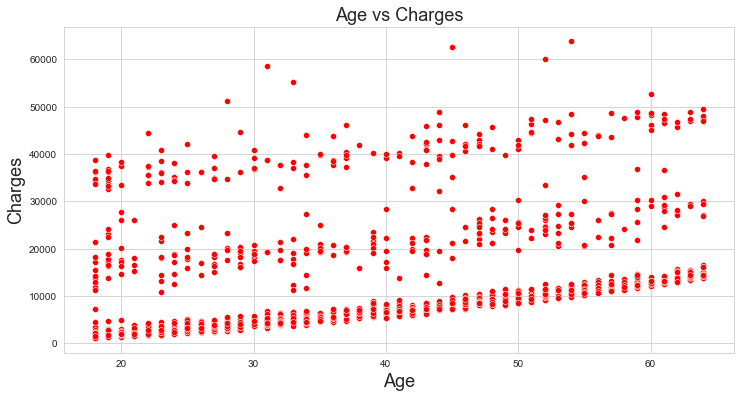

In [47]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="age", y="charges", data=df,color="r")
plt.title("Age vs Charges", size=18)
plt.xlabel("Age", size=18)
plt.ylabel("Charges", size=18)
plt.show()

A scatterplot is a type of data display that shows the relationship between two numerical variables.

We see that there is a weak positive relationship between age and charges values. As age increases charges also slightly increase.

.corr() method also shows us the relationship between the two variables.

In [49]:
print("Correlation between age and charges is: {}".format(round(df.corr()["age"]["charges"],3)))

Correlation between age and charges is: 0.298


### Smoker vs Charges

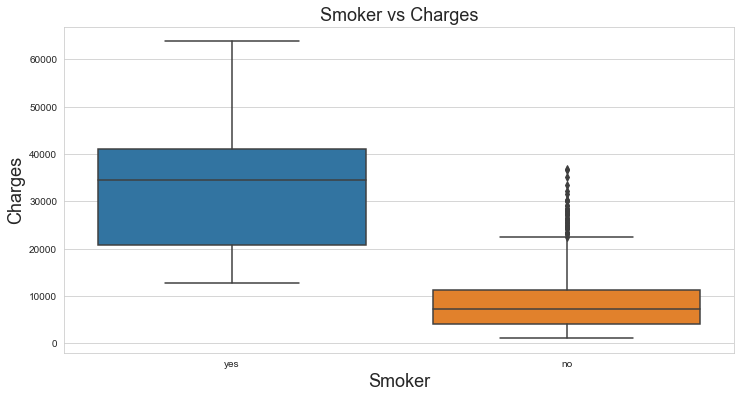

In [50]:
plt.figure(figsize=(12,6))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Smoker vs Charges", size=18)
plt.xlabel("Smoker", size=18)
plt.ylabel("Charges", size=18)
plt.show()


The boxplot shows us the cost of insurance for smokers is higher than for non-smokers.

#### Using Pairplot for Numerical Values

Pair plot is another awesome method that shows us the relationship between two numerical values as well as the distribution of each variable.

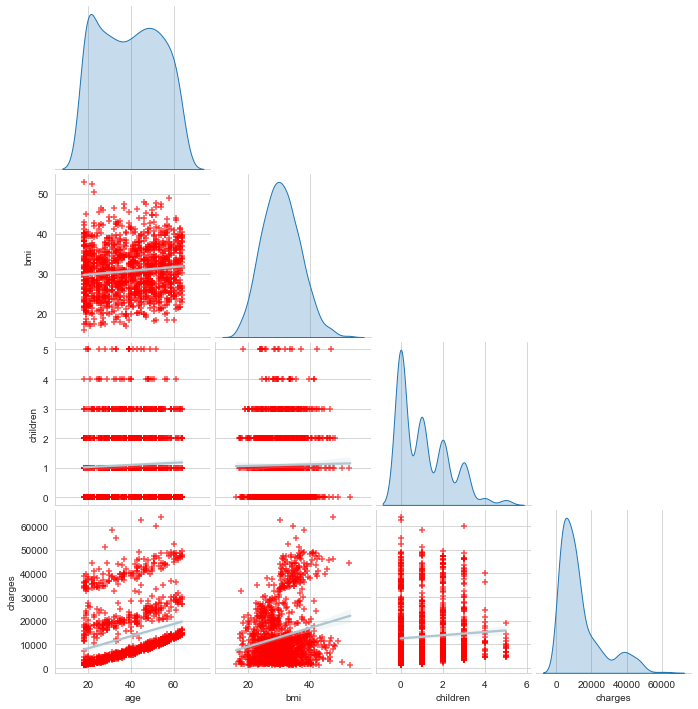

In [51]:
sns.pairplot(df, 
         markers="+",
         diag_kind="kde",
         kind="reg",
         plot_kws ={"line_kws": {"color": "#aec6cf"},
                     "scatter_kws": {"alpha": 0.7,
                     "color" : "r"}},
                     corner = True);

### .3 Multivariate Analysis

#### Correlation

Correlation is used to test relationships between quantitative variables or categorical variables. It’s a measure of how things are related. The table above shows us how we can interpret correlation coefficients.

As we said earlier, seaborn is an awesome library that helps us visualize our variables easily and clearly. The heatmap() method shows us the relationship between numeric variables.

There are different methods to calculate correlation coefficient ;

* Pearson
* Kendall
* Spearman
We will combine the .corr() method with heatmap so that we will be able to see the relationship in the graph. .corr() method is used Pearson correlation by default.

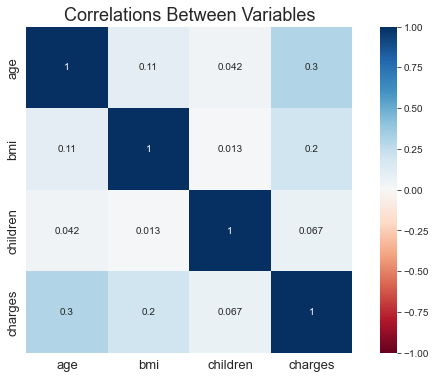

In [52]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot=True,square=True,
            cmap='RdBu',
            vmax=1,
            vmin=-1)
plt.title('Correlations Between Variables',size=18);
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

The heatmap shows us there is a correlation between age and charges. As the age increases insurance charges also increase or vice versa.

We can also see that there is a weak correlation between BMI and charges.

There is almost no relationship between children and charges.

### Conclusion
In this post, We examined our dataset using exploratory data analysis and try to understand each variable as well as their relationship with each other.

The main purpose of EDA is to help understand data before making any assumptions. EDA helps us to see distribution, summary statistics, relationships between variables and outliers.